<a href="https://colab.research.google.com/github/rizkaaa19/MachineLearning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Path to the CSV file in Google Drive
file_path = "/content/gdrive/MyDrive/vid pancasila/EconomiesOfScale.csv"

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [16]:
df.head(15)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [ ]:
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


memvisualisasikan data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

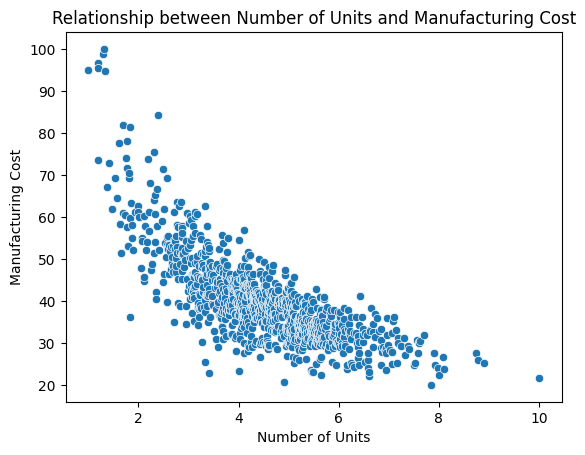

In [ ]:
sns.scatterplot(data=df, x="Number of Units", y="Manufacturing Cost")

# Menambahkan label dan judul
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.title('Relationship between Number of Units and Manufacturing Cost')

#Menampilkan plot
plt.show()

membuat model dengan polynomial regression

In [ ]:
# Kolom label (variable dependen)
x - df["Number of Units"]

# Kolom target (variable independen)
y = df["Manufacturing Cost"]

In [14]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

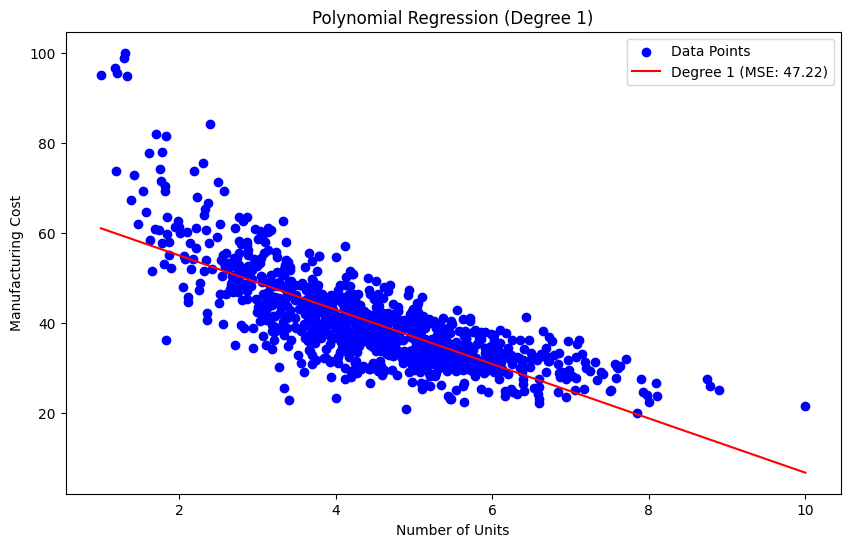

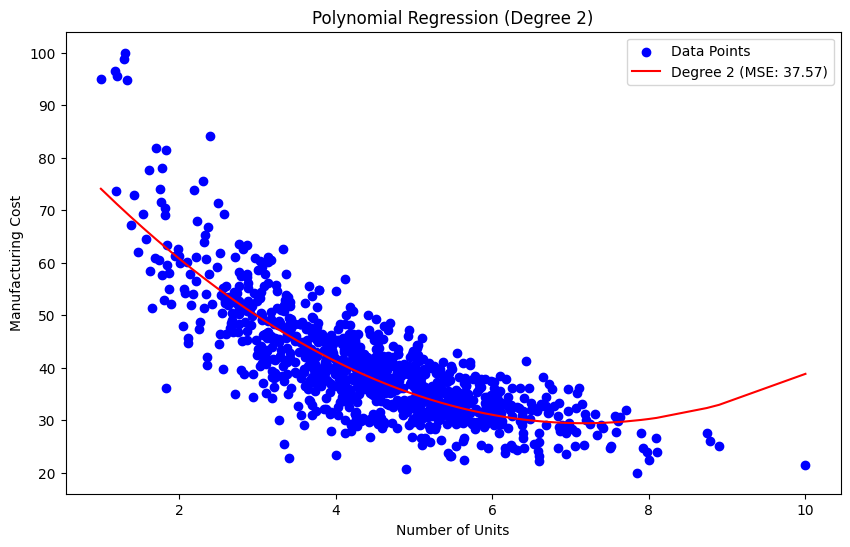

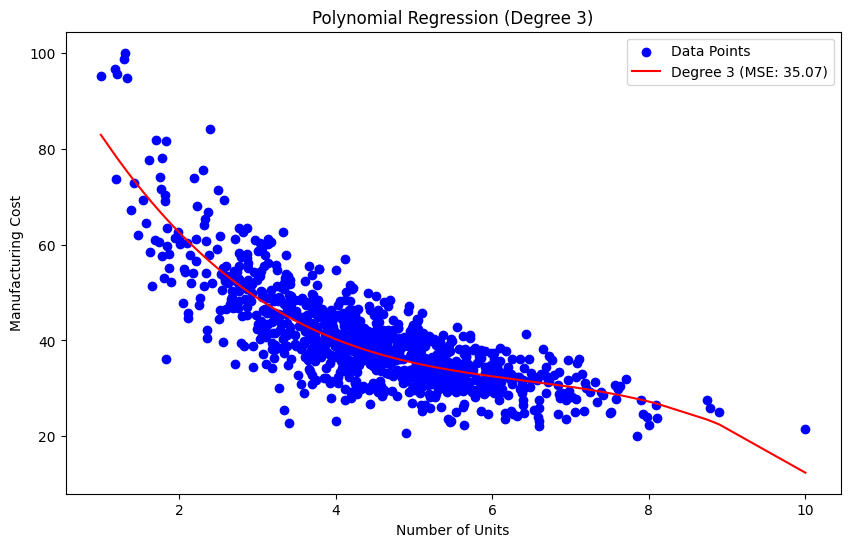

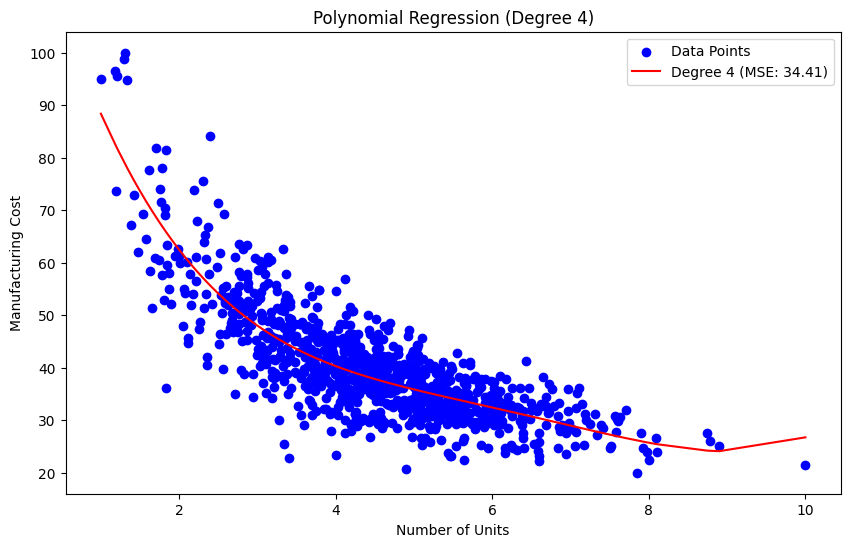

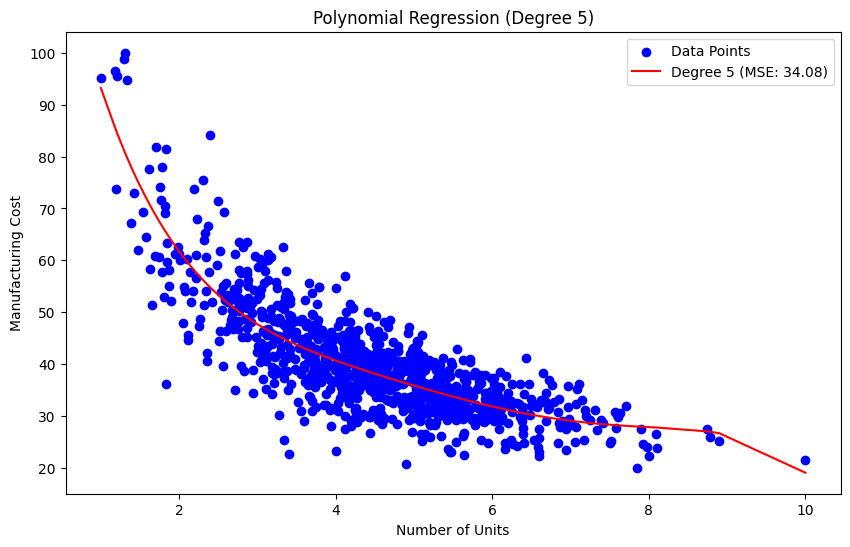

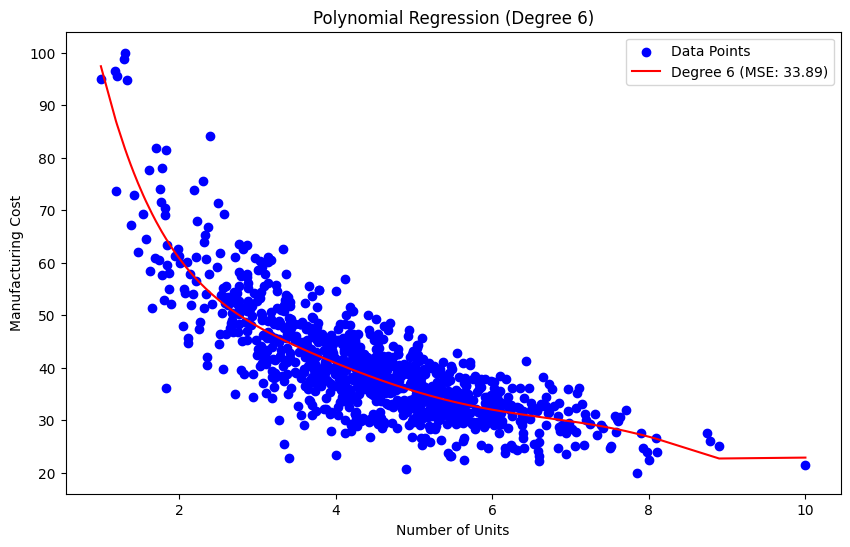

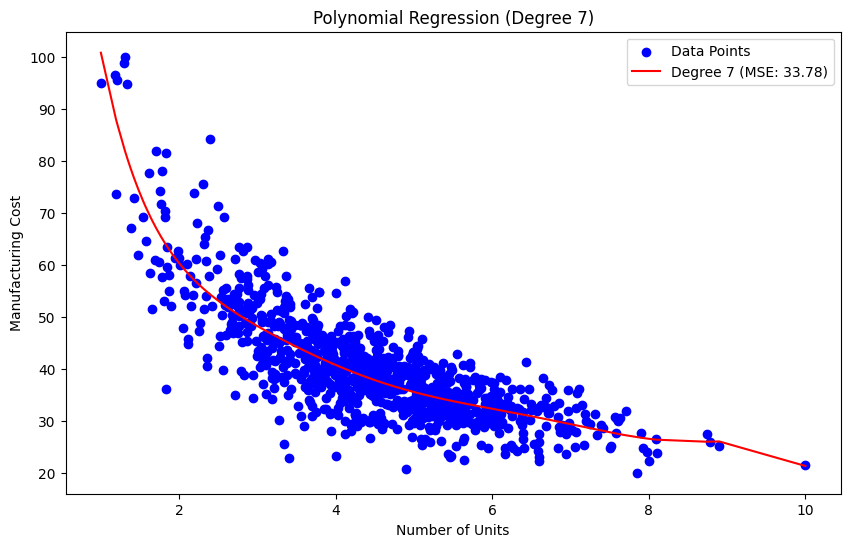

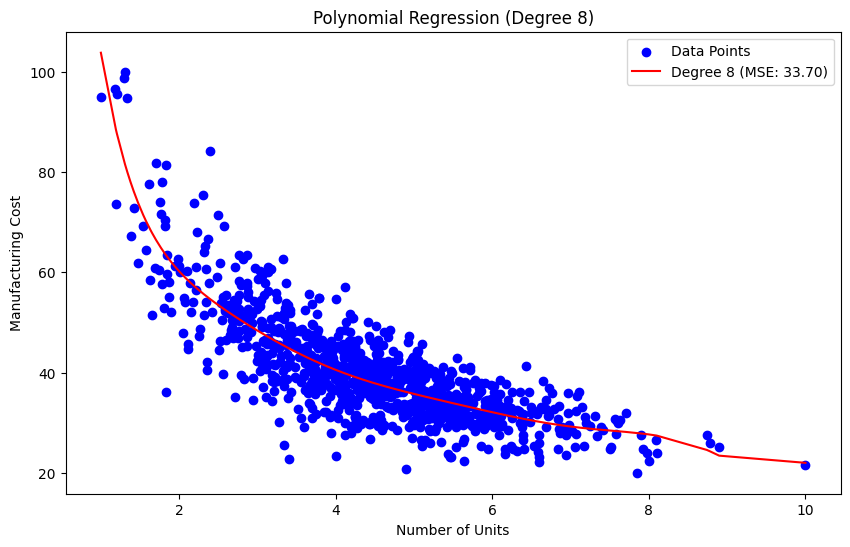

Mean Squared Error (MSE) for each degree:
Degree 1: 47.22
Degree 2: 37.57
Degree 3: 35.07
Degree 4: 34.41
Degree 5: 34.08
Degree 6: 33.89
Degree 7: 33.78
Degree 8: 33.70


In [18]:
# Data
x = df['Number of Units'].values.reshape(-1, 1)  # Variabel x: Number of Units
y = df['Manufacturing Cost'].values  # Variabel y: Manufacturing Cost

# Menghitung MSE untuk setiap derajat polynomial
mse_values = []

for degree in range(1, 9):
    # Mengubah fitur menjadi polinomial
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    # Membuat model regresi polinomial
    model = LinearRegression()
    model.fit(x_poly, y)

    # Menghitung prediksi
    y_pred = model.predict(x_poly)

    # Menghitung Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot hasil regresi
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, y_pred, color='red', label=f'Degree {degree} (MSE: {mse:.2f})')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Menampilkan MSE untuk setiap derajat polynomial
print('Mean Squared Error (MSE) for each degree:')
for degree, mse in enumerate(mse_values, start=1):
    print(f'Degree {degree}: {mse:.2f}')